In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split

## One Hot Encoding

In [11]:
usecols = ["pclass", "sibsp", "parch", "sex", "embarked", "cabin", "survived"]
data = pd.read_csv("titanic.csv", usecols=usecols)
data.head()

,pclass,survived,sex,sibsp,parch,cabin,embarked
0,1,1,female,0,0,B5,S
1,1,1,male,1,2,C22,S
2,1,0,female,1,2,C22,S
3,1,0,male,1,2,C22,S
4,1,0,female,1,2,C22,S


In [12]:
data["cabin"] = data["cabin"].str[0]

In [13]:
X_train,X_test,y_train,y_test = train_test_split(data.drop(columns=["survived"]),data["survived"],test_size=0.3,random_state=0)

In [14]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((916, 6), (393, 6), (916,), (393,))

In [15]:
# cardinality
X_train["sex"].unique()

array(['female', 'male'], dtype=object)

In [16]:
X_train["embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [17]:
X_train["cabin"].unique()

array([nan, 'E', 'C', 'D', 'B', 'A', 'F', 'T', 'G'], dtype=object)

In [18]:
# encode for one varibale
tmp = pd.get_dummies(X_train["sex"])
tmp.head()

,female,male
501,True,False
588,True,False
402,True,False
1193,False,True
686,True,False


In [19]:
pd.concat([X_train["sex"],pd.get_dummies(X_train["sex"])],axis=1).head()

,sex,female,male
501,female,True,False
588,female,True,False
402,female,True,False
1193,male,False,True
686,female,True,False


In [20]:
# encode for all traing variables
X_train_enc = pd.get_dummies(X_train)
X_test_enc = pd.get_dummies(X_test)

X_train_enc.head()

,pclass,sibsp,parch,sex_female,sex_male,cabin_A,cabin_B,cabin_C,cabin_D,cabin_E,cabin_F,cabin_G,cabin_T,embarked_C,embarked_Q,embarked_S
501,2,0,1,True,False,False,False,False,False,False,False,False,False,False,False,True
588,2,1,1,True,False,False,False,False,False,False,False,False,False,False,False,True
402,2,1,0,True,False,False,False,False,False,False,False,False,False,True,False,False
1193,3,0,0,False,True,False,False,False,False,False,False,False,False,False,True,False
686,3,0,0,True,False,False,False,False,False,False,False,False,False,False,True,False


In [21]:
#k-1 variable
tmp = pd.get_dummies(X_train["sex"],drop_first=True)
tmp.head()

,male
501,False
588,False
402,False
1193,True
686,False


In [22]:
X_train_enc = pd.get_dummies(X_train,drop_first=True)
X_test_enc = pd.get_dummies(X_test,drop_first=True)

X_train_enc.head()

,pclass,sibsp,parch,sex_male,cabin_B,cabin_C,cabin_D,cabin_E,cabin_F,cabin_G,cabin_T,embarked_Q,embarked_S
501,2,0,1,False,False,False,False,False,False,False,False,False,True
588,2,1,1,False,False,False,False,False,False,False,False,False,True
402,2,1,0,False,False,False,False,False,False,False,False,False,False
1193,3,0,0,True,False,False,False,False,False,False,False,True,False
686,3,0,0,False,False,False,False,False,False,False,False,True,False


In [23]:
X_train_enc = X_train_enc.astype(int)

In [24]:
X_train_enc.head()

,pclass,sibsp,parch,sex_male,cabin_B,cabin_C,cabin_D,cabin_E,cabin_F,cabin_G,cabin_T,embarked_Q,embarked_S
501,2,0,1,0,0,0,0,0,0,0,0,0,1
588,2,1,1,0,0,0,0,0,0,0,0,0,1
402,2,1,0,0,0,0,0,0,0,0,0,0,0
1193,3,0,0,1,0,0,0,0,0,0,0,1,0
686,3,0,0,0,0,0,0,0,0,0,0,1,0


## Ordinal Encoding

In [25]:
data = pd.read_csv("train.csv",usecols=["Neighborhood", "Exterior1st", "Exterior2nd", "SalePrice"])
data.head()

,Neighborhood,Exterior1st,Exterior2nd,SalePrice
0,CollgCr,VinylSd,VinylSd,208500
1,Veenker,MetalSd,MetalSd,181500
2,CollgCr,VinylSd,VinylSd,223500
3,Crawfor,Wd Sdng,Wd Shng,140000
4,NoRidge,VinylSd,VinylSd,250000


In [27]:
len(data["Neighborhood"].unique())

25

In [28]:
data["Exterior1st"].unique()

array(['VinylSd', 'MetalSd', 'Wd Sdng', 'HdBoard', 'BrkFace', 'WdShing',
       'CemntBd', 'Plywood', 'AsbShng', 'Stucco', 'BrkComm', 'AsphShn',
       'Stone', 'ImStucc', 'CBlock'], dtype=object)

In [29]:
data["Exterior2nd"].unique()

array(['VinylSd', 'MetalSd', 'Wd Shng', 'HdBoard', 'Plywood', 'Wd Sdng',
       'CmentBd', 'BrkFace', 'Stucco', 'AsbShng', 'Brk Cmn', 'ImStucc',
       'AsphShn', 'Stone', 'Other', 'CBlock'], dtype=object)

In [30]:
X_train,X_test,y_train,y_test = train_test_split(data.drop(columns=["SalePrice"]),data["SalePrice"],test_size=0.3,random_state=0)

In [31]:
ordinal_map = {k:i for i,k in enumerate(X_train["Neighborhood"].unique(),0)}

In [32]:
ordinal_map

{'CollgCr': 0,
 'ClearCr': 1,
 'BrkSide': 2,
 'Edwards': 3,
 'SWISU': 4,
 'Sawyer': 5,
 'Crawfor': 6,
 'NAmes': 7,
 'Mitchel': 8,
 'Timber': 9,
 'Gilbert': 10,
 'Somerst': 11,
 'MeadowV': 12,
 'OldTown': 13,
 'BrDale': 14,
 'NWAmes': 15,
 'NridgHt': 16,
 'SawyerW': 17,
 'NoRidge': 18,
 'IDOTRR': 19,
 'NPkVill': 20,
 'StoneBr': 21,
 'Blmngtn': 22,
 'Veenker': 23,
 'Blueste': 24}

In [33]:
X_train["Neighborhood"] = X_train["Neighborhood"].map(ordinal_map)
X_test["Neighborhood"] = X_test["Neighborhood"].map(ordinal_map)

In [34]:
X_train.head()

,Neighborhood,Exterior1st,Exterior2nd
64,0,VinylSd,VinylSd
682,1,Wd Sdng,Wd Sdng
960,2,Wd Sdng,Plywood
1384,3,WdShing,Wd Shng
1100,4,Wd Sdng,Wd Sdng


In [35]:
def find_category_mappings(df, variable):
    return {k: i for i, k in enumerate(df[variable].unique(), 0)}

def integer_encode(train, test, variable, ordinal_mapping):
    X_train[variable] = X_train[variable].map(ordinal_mapping)
    X_test[variable] = X_test[variable].map(ordinal_mapping)

for variable in ["Exterior1st", "Exterior2nd"]:
    mappings = find_category_mappings(X_train, variable)
    integer_encode(X_train, X_test, variable, mappings)

In [36]:
X_train.head()

,Neighborhood,Exterior1st,Exterior2nd
64,0,0,0
682,1,1,1
960,2,1,2
1384,3,2,3
1100,4,1,1


## Frequency Encoding

In [37]:
data = pd.read_csv("train.csv",usecols=["Neighborhood", "Exterior1st", "Exterior2nd", "SalePrice"])
data.head()

,Neighborhood,Exterior1st,Exterior2nd,SalePrice
0,CollgCr,VinylSd,VinylSd,208500
1,Veenker,MetalSd,MetalSd,181500
2,CollgCr,VinylSd,VinylSd,223500
3,Crawfor,Wd Sdng,Wd Shng,140000
4,NoRidge,VinylSd,VinylSd,250000


In [38]:
X_train,X_test,y_train,y_test = train_test_split(data.drop(columns=["SalePrice"]),data["SalePrice"],test_size=0.3,random_state=0)

In [40]:
count_map = X_train["Neighborhood"].value_counts().to_dict()
count_map

{'NAmes': 151,
 'CollgCr': 105,
 'OldTown': 73,
 'Edwards': 71,
 'Sawyer': 61,
 'Somerst': 56,
 'Gilbert': 55,
 'NWAmes': 51,
 'NridgHt': 51,
 'SawyerW': 45,
 'BrkSide': 41,
 'Mitchel': 36,
 'Crawfor': 35,
 'Timber': 30,
 'NoRidge': 30,
 'ClearCr': 24,
 'IDOTRR': 24,
 'SWISU': 18,
 'StoneBr': 16,
 'Blmngtn': 12,
 'MeadowV': 12,
 'BrDale': 10,
 'NPkVill': 7,
 'Veenker': 6,
 'Blueste': 2}

In [41]:
X_train["Neighborhood"] = X_train["Neighborhood"].map(count_map)
X_test["Neighborhood"] = X_test["Neighborhood"].map(count_map)

In [42]:
X_train.head()

,Neighborhood,Exterior1st,Exterior2nd
64,105,VinylSd,VinylSd
682,24,Wd Sdng,Wd Sdng
960,41,Wd Sdng,Plywood
1384,71,WdShing,Wd Shng
1100,18,Wd Sdng,Wd Sdng


## Ordered Ordinal Encoding

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [51]:
data = pd.read_csv(
    "train.csv",
    usecols=["Neighborhood", "Exterior1st", "Exterior2nd", "SalePrice"],
)
data.head()

,Neighborhood,Exterior1st,Exterior2nd,SalePrice
0,CollgCr,VinylSd,VinylSd,208500
1,Veenker,MetalSd,MetalSd,181500
2,CollgCr,VinylSd,VinylSd,223500
3,Crawfor,Wd Sdng,Wd Shng,140000
4,NoRidge,VinylSd,VinylSd,250000


In [52]:
for col in data.columns:
  print(f"{col}: {len(data[col].unique())}")

Neighborhood: 25
Exterior1st: 15
Exterior2nd: 16
SalePrice: 663


In [53]:
X_train,X_test,y_train,y_test = train_test_split(data.drop(columns=["SalePrice"]),data["SalePrice"],test_size=0.3,random_state=0)

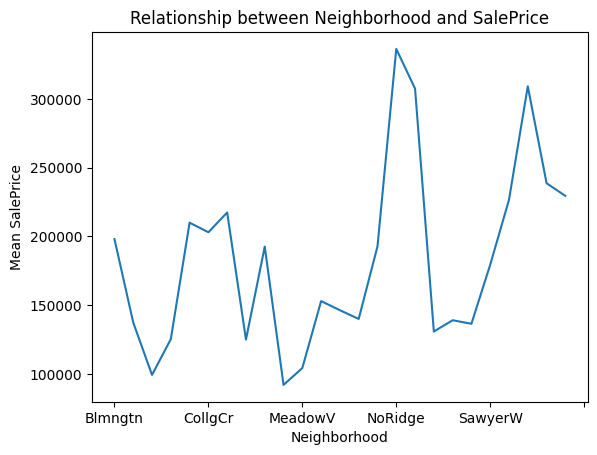

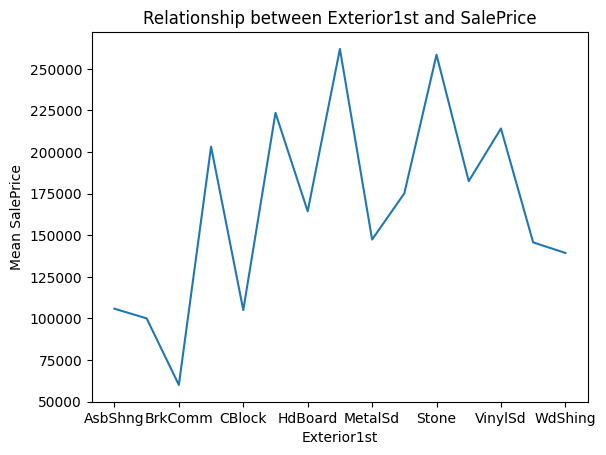

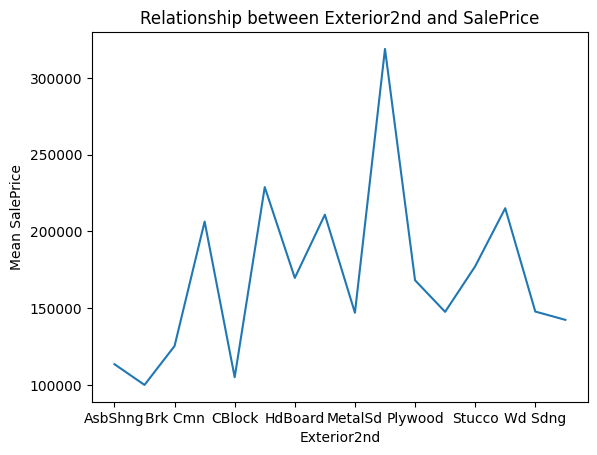

In [55]:
for var in ["Neighborhood", "Exterior1st", "Exterior2nd"]:
  fig = plt.figure()
  fig = y_train.groupby(X_train[var]).mean().plot()
  fig.set_title("Relationship between {} and SalePrice".format(var))
  fig.set_ylabel("Mean SalePrice")
  plt.show()

In [57]:
y_train.groupby(X_train["Neighborhood"]).mean().sort_values()

,SalePrice
Neighborhood,
IDOTRR,92174.166667
BrDale,99440.000000
MeadowV,104441.666667
Edwards,125082.676056
BrkSide,125438.414634
OldTown,130958.328767
Sawyer,136596.442623
Blueste,137500.000000
SWISU,139154.666667


In [59]:
ordered_labels = y_train.groupby(X_train["Neighborhood"]).mean().sort_values().index

In [60]:
ordered_labels

Index(['IDOTRR', 'BrDale', 'MeadowV', 'Edwards', 'BrkSide', 'OldTown',
       'Sawyer', 'Blueste', 'SWISU', 'NPkVill', 'NAmes', 'Mitchel', 'SawyerW',
       'Gilbert', 'NWAmes', 'Blmngtn', 'CollgCr', 'ClearCr', 'Crawfor',
       'Somerst', 'Veenker', 'Timber', 'NridgHt', 'StoneBr', 'NoRidge'],
      dtype='object', name='Neighborhood')

In [61]:
ordered_map = {k:i for i,k in enumerate(ordered_labels,0)}
ordered_map

{'IDOTRR': 0,
 'BrDale': 1,
 'MeadowV': 2,
 'Edwards': 3,
 'BrkSide': 4,
 'OldTown': 5,
 'Sawyer': 6,
 'Blueste': 7,
 'SWISU': 8,
 'NPkVill': 9,
 'NAmes': 10,
 'Mitchel': 11,
 'SawyerW': 12,
 'Gilbert': 13,
 'NWAmes': 14,
 'Blmngtn': 15,
 'CollgCr': 16,
 'ClearCr': 17,
 'Crawfor': 18,
 'Somerst': 19,
 'Veenker': 20,
 'Timber': 21,
 'NridgHt': 22,
 'StoneBr': 23,
 'NoRidge': 24}

In [62]:
X_train["Neighborhood"] = X_train["Neighborhood"].map(ordered_map)
X_test["Neighborhood"] = X_test["Neighborhood"].map(ordered_map)

In [63]:
X_train.head()

,Neighborhood,Exterior1st,Exterior2nd
64,16,VinylSd,VinylSd
682,17,Wd Sdng,Wd Sdng
960,4,Wd Sdng,Plywood
1384,3,WdShing,Wd Shng
1100,8,Wd Sdng,Wd Sdng


In [64]:
def find_category_mappings(df, variable, target):
    ordered_labels = target.groupby(df[variable]).mean().sort_values().index
    return {k: i for i, k in enumerate(ordered_labels, 0)}

def integer_encode(train, test, variable, ordinal_mapping):
    train[variable] = train[variable].map(ordinal_mapping)
    test[variable] = test[variable].map(ordinal_mapping)

In [65]:
for variable in ["Exterior1st", "Exterior2nd"]:
    mappings = find_category_mappings(X_train, variable, y_train)
    integer_encode(X_train, X_test, variable, mappings)

In [66]:
X_train.head()

,Neighborhood,Exterior1st,Exterior2nd
64,16,11,13
682,17,5,7
960,4,5,8
1384,3,4,4
1100,8,5,7


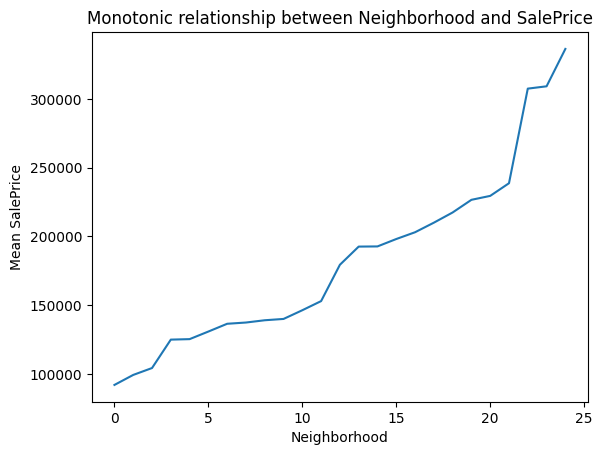

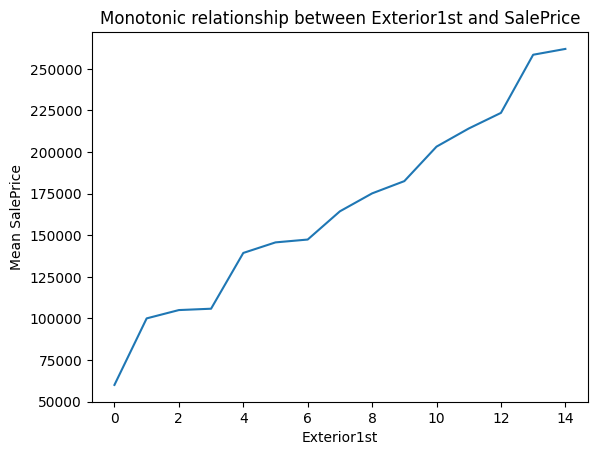

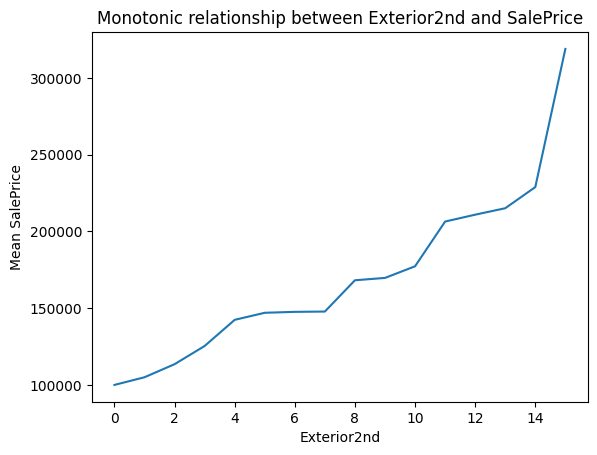

In [67]:
# the plots in the train set are monotonic
for var in ["Neighborhood", "Exterior1st", "Exterior2nd"]:
    fig = plt.figure()
    fig = y_train.groupby(X_train[var]).mean().plot()
    fig.set_title("Monotonic relationship between {} and SalePrice".format(var))
    fig.set_ylabel("Mean SalePrice")
    plt.show()

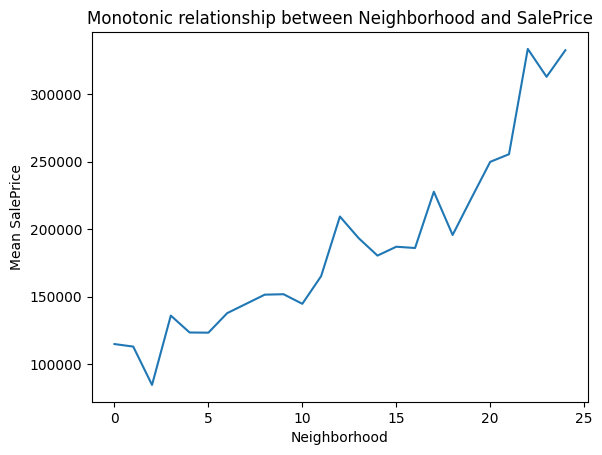

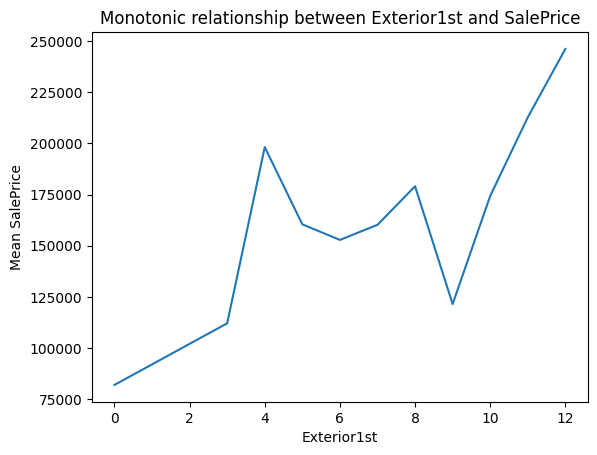

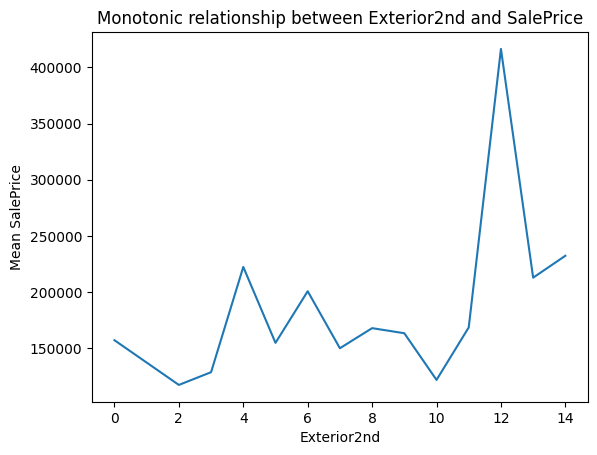

In [68]:
# the monotonicity is lost for test set,hence it will cause overfitting
for var in ["Neighborhood", "Exterior1st", "Exterior2nd"]:
    fig = plt.figure()
    fig = y_test.groupby(X_test[var]).mean().plot()
    fig.set_title("Monotonic relationship between {} and SalePrice".format(var))
    fig.set_ylabel("Mean SalePrice")
    plt.show()

## Mean Encoding or Target Encoding

In [71]:
import pandas as pd
from sklearn.model_selection import train_test_split
from category_encoders.target_encoder import TargetEncoder

In [72]:
data = pd.read_csv("titanic.csv",usecols=["cabin", "sex", "embarked", "survived"])

In [73]:
data.head()

,survived,sex,cabin,embarked
0,1,female,B5,S
1,1,male,C22,S
2,0,female,C22,S
3,0,male,C22,S
4,0,female,C22,S


In [76]:
data['cabin'] = data['cabin'].astype(str).str[0]

In [77]:
data.fillna("Missing", inplace=True)

In [78]:
X_train,X_test,y_train,y_test = train_test_split(data.drop(columns=["survived"]),data["survived"],test_size=0.3,random_state=0)

In [79]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((916, 3), (393, 3), (916,), (393,))

In [80]:
mean_enc = TargetEncoder(cols=["cabin", "sex", "embarked"],smoothing=10)
mean_enc.fit(X_train, y_train)
X_train = mean_enc.transform(X_train)
X_test = mean_enc.transform(X_test)

In [81]:
X_train.head()

,sex,cabin,embarked
501,0.728358,0.304843,0.338957
588,0.728358,0.304843,0.338957
402,0.728358,0.304843,0.553073
1193,0.187608,0.304843,0.373516
686,0.728358,0.304843,0.373516


## Weight of evidence

In [82]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from category_encoders.woe import WOEEncoder

In [83]:
data = pd.read_csv("titanic.csv",usecols=["cabin", "sex", "embarked", "survived"])

In [84]:
data.dropna(subset=["embarked"], inplace=True)
data.shape

(1307, 4)

In [85]:
data["cabin"] = data["cabin"].astype(str).str[0]

In [91]:
data = data[data["cabin"] != "T"]
data.shape

(1306, 4)

In [92]:
X_train,X_test,y_train,y_test = train_test_split(data.drop(columns=["survived"]),data["survived"],test_size=0.3,random_state=0)

In [93]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((914, 3), (392, 3), (914,), (392,))

In [94]:
woe_enc = WOEEncoder(cols=["cabin", "sex", "embarked"])
woe_enc.fit(X_train, y_train)
X_train = woe_enc.transform(X_train)
X_test = woe_enc.transform(X_test)

In [95]:
X_train.head()

,sex,cabin,embarked
843,-1.008094,-0.374548,-0.164851
869,-1.008094,-0.374548,-0.164851
430,1.525265,-0.374548,-0.164851
481,1.525265,-0.374548,0.654977
1308,-1.008094,-0.374548,-0.164851


## One Hot Encoding of Frequent Category

In [96]:
data = pd.read_csv("train.csv",usecols=["Neighborhood", "Exterior1st", "Exterior2nd", "SalePrice"],)
data.head()

,Neighborhood,Exterior1st,Exterior2nd,SalePrice
0,CollgCr,VinylSd,VinylSd,208500
1,Veenker,MetalSd,MetalSd,181500
2,CollgCr,VinylSd,VinylSd,223500
3,Crawfor,Wd Sdng,Wd Shng,140000
4,NoRidge,VinylSd,VinylSd,250000


In [97]:
for var in data.columns:
  print(f"{var}: {len(data[var].unique())}")

Neighborhood: 25
Exterior1st: 15
Exterior2nd: 16
SalePrice: 663


In [98]:
X_train,X_test,y_train,y_test = train_test_split(data.drop(columns=["SalePrice"]),data["SalePrice"],test_size=0.3,random_state=0)

In [102]:
top_10 = X_train["Neighborhood"].value_counts().sort_values(ascending=False).head(10)

In [108]:
top_10.index

Index(['NAmes', 'CollgCr', 'OldTown', 'Edwards', 'Sawyer', 'Somerst',
       'Gilbert', 'NWAmes', 'NridgHt', 'SawyerW'],
      dtype='object', name='Neighborhood')

In [106]:
import numpy as np

for label in top_10.index:
    X_train["Neighborhood" + "_" + label] = np.where(
        X_train["Neighborhood"] == label, 1, 0
    )

    X_test["Neighborhood" + "_" + label] = np.where(
        X_test["Neighborhood"] == label, 1, 0
    )

In [109]:
X_train.head()

,Neighborhood,Exterior1st,Exterior2nd,Neighborhood_NAmes,Neighborhood_CollgCr,Neighborhood_OldTown,Neighborhood_Edwards,Neighborhood_Sawyer,Neighborhood_Somerst,Neighborhood_Gilbert,Neighborhood_NWAmes,Neighborhood_NridgHt,Neighborhood_SawyerW
64,CollgCr,VinylSd,VinylSd,0,1,0,0,0,0,0,0,0,0
682,ClearCr,Wd Sdng,Wd Sdng,0,0,0,0,0,0,0,0,0,0
960,BrkSide,Wd Sdng,Plywood,0,0,0,0,0,0,0,0,0,0
1384,Edwards,WdShing,Wd Shng,0,0,0,1,0,0,0,0,0,0
1100,SWISU,Wd Sdng,Wd Sdng,0,0,0,0,0,0,0,0,0,0


In [110]:
def calculate_top_categories(df, variable, how_many=10):
    return [x for x in df[variable].value_counts().sort_values(ascending=False).head(how_many).index]

def one_hot_encode(train, test, variable, top_x_labels):
    for label in top_x_labels:
        train[variable + "_" + label] = np.where(train[variable] == label, 1, 0)
        test[variable + "_" + label] = np.where(test[variable] == label, 1, 0)

In [111]:
for variable in ["Exterior1st", "Exterior2nd"]:
    top_categories = calculate_top_categories(X_train, variable, how_many=10)
    one_hot_encode(X_train, X_test, variable, top_categories)

In [112]:
X_train.head()

,Neighborhood,Exterior1st,Exterior2nd,Neighborhood_NAmes,Neighborhood_CollgCr,Neighborhood_OldTown,Neighborhood_Edwards,Neighborhood_Sawyer,Neighborhood_Somerst,Neighborhood_Gilbert,Neighborhood_NWAmes,Neighborhood_NridgHt,Neighborhood_SawyerW,Exterior1st_VinylSd,Exterior1st_HdBoard,Exterior1st_Wd Sdng,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_CemntBd,Exterior1st_BrkFace,Exterior1st_WdShing,Exterior1st_Stucco,Exterior1st_AsbShng,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_CmentBd,Exterior2nd_Wd Shng,Exterior2nd_BrkFace,Exterior2nd_AsbShng,Exterior2nd_Stucco
64,CollgCr,VinylSd,VinylSd,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
682,ClearCr,Wd Sdng,Wd Sdng,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
960,BrkSide,Wd Sdng,Plywood,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1384,Edwards,WdShing,Wd Shng,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
1100,SWISU,Wd Sdng,Wd Sdng,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


## Grouping Rare Labels

In [113]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [114]:
pd.set_option(
    "display.max_columns", None
)

In [115]:
data = pd.read_csv("train.csv")
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [116]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(labels=["SalePrice"], axis=1),data["SalePrice"],test_size=0.3,random_state=0)
X_train.shape, X_test.shape

((1022, 80), (438, 80))

In [120]:
# variables with high cardinality
multi_cat_cols = []
for col in X_train.columns:
    if X_train[col].dtypes == "O":  # if variable  is categorical
        if X_train[col].nunique() > 10:  # and has more than 10 categories
            multi_cat_cols.append(col)  # add to the list
            print(
                X_train.groupby(col)[col].count() / len(X_train)
            )  # and print the percentage of observations within each category
            print()

Neighborhood
Blmngtn    0.011742
Blueste    0.001957
BrDale     0.009785
BrkSide    0.040117
ClearCr    0.023483
CollgCr    0.102740
Crawfor    0.034247
Edwards    0.069472
Gilbert    0.053816
IDOTRR     0.023483
MeadowV    0.011742
Mitchel    0.035225
NAmes      0.147750
NPkVill    0.006849
NWAmes     0.049902
NoRidge    0.029354
NridgHt    0.049902
OldTown    0.071429
SWISU      0.017613
Sawyer     0.059687
SawyerW    0.044031
Somerst    0.054795
StoneBr    0.015656
Timber     0.029354
Veenker    0.005871
Name: Neighborhood, dtype: float64

Exterior1st
AsbShng    0.014677
AsphShn    0.000978
BrkComm    0.000978
BrkFace    0.034247
CBlock     0.000978
CemntBd    0.038160
HdBoard    0.149706
ImStucc    0.000978
MetalSd    0.135029
Plywood    0.084149
Stone      0.001957
Stucco     0.016634
VinylSd    0.356164
Wd Sdng    0.144814
WdShing    0.020548
Name: Exterior1st, dtype: float64

Exterior2nd
AsbShng    0.016634
AsphShn    0.000978
Brk Cmn    0.003914
BrkFace    0.017613
CBlock     0

In [121]:
multi_cat_cols

['Neighborhood', 'Exterior1st', 'Exterior2nd']

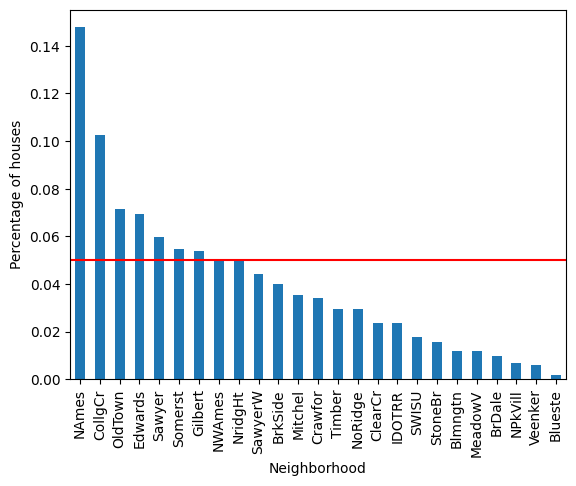

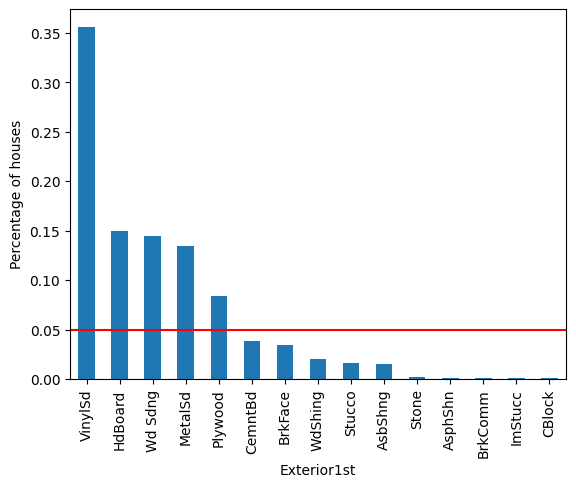

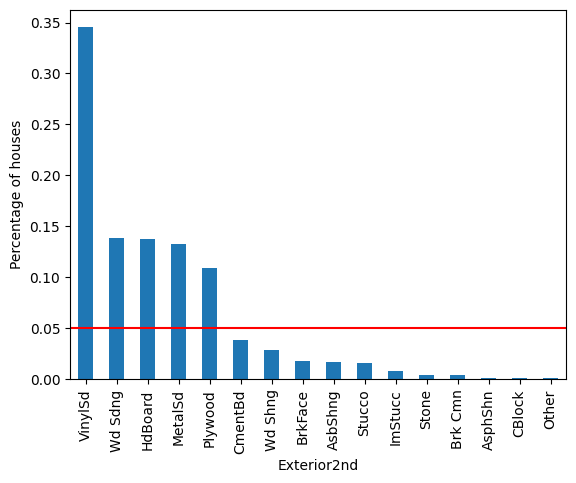

In [122]:
for col in multi_cat_cols:
    temp_df = pd.Series(X_train[col].value_counts() / len(X_train))
    fig = temp_df.sort_values(ascending=False).plot.bar()
    fig.set_xlabel(col)
    # add a line at 5 % to flag the threshold for rare categories
    fig.axhline(y=0.05, color="red")
    fig.set_ylabel("Percentage of houses")
    plt.show()

In [123]:
# non rare labels
def find_non_rare_labels(df, variable, tolerance):
    temp = df.groupby([variable])[variable].count() / len(df)
    non_rare = [x for x in temp.loc[temp > tolerance].index.values]
    return non_rare

find_non_rare_labels(X_train, "Neighborhood", 0.05)

['CollgCr', 'Edwards', 'Gilbert', 'NAmes', 'OldTown', 'Sawyer', 'Somerst']

In [124]:
# rare
[x for x in X_train["Neighborhood"].unique() if x not in find_non_rare_labels(X_train, "Neighborhood", 0.05)]

['ClearCr',
 'BrkSide',
 'SWISU',
 'Crawfor',
 'Mitchel',
 'Timber',
 'MeadowV',
 'BrDale',
 'NWAmes',
 'NridgHt',
 'SawyerW',
 'NoRidge',
 'IDOTRR',
 'NPkVill',
 'StoneBr',
 'Blmngtn',
 'Veenker',
 'Blueste']

In [125]:
def rare_encoding(X_train, X_test, variable, tolerance):
    X_train = X_train.copy()
    X_test = X_test.copy()
    # find the most frequent category
    frequent_cat = find_non_rare_labels(X_train, variable, tolerance)
    # re-group rare labels
    X_train[variable] = np.where(
        X_train[variable].isin(frequent_cat), X_train[variable], "Rare"
    )
    X_test[variable] = np.where(
        X_test[variable].isin(frequent_cat), X_test[variable], "Rare"
    )
    return X_train, X_test

In [126]:
for variable in ["Neighborhood", "Exterior1st", "Exterior2nd"]:
    X_train, X_test = rare_encoding(X_train, X_test, variable, 0.05)

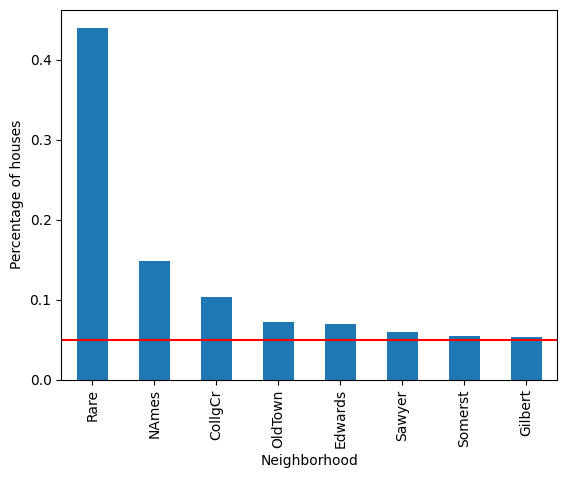

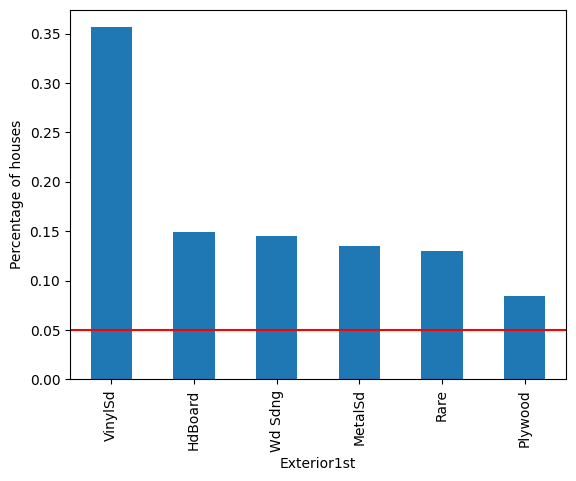

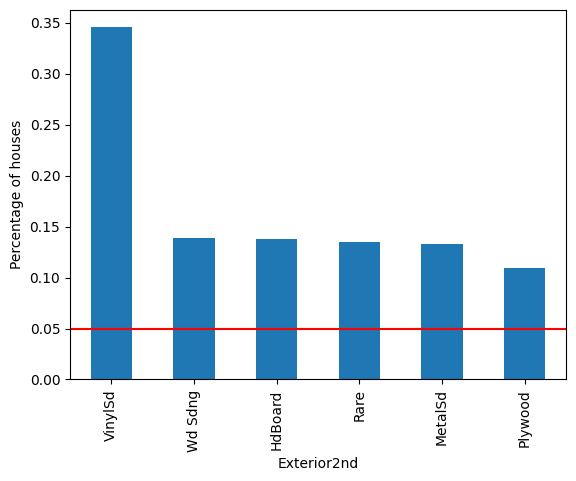

In [127]:
for col in ["Neighborhood", "Exterior1st", "Exterior2nd"]:
    temp_df = pd.Series(X_train[col].value_counts() / len(X_train))
    # make plot with the above percentages
    fig = temp_df.sort_values(ascending=False).plot.bar()
    fig.set_xlabel(col)
    # add a line at 5 % to flag the threshold for rare categories
    fig.axhline(y=0.05, color="red")
    fig.set_ylabel("Percentage of houses")
    plt.show()

In [128]:
X_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
64,65,60,RL,NaN,9375,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,573.0,TA,TA,PConc,Gd,TA,No,GLQ,739,Unf,0,318,1057,GasA,Ex,Y,SBrkr,1057,977,0,2034,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,1998.0,RFn,2,645,TA,TA,Y,576,36,0,0,0,0,NaN,GdPrv,NaN,0,2,2009,WD,Normal
682,683,120,RL,NaN,2887,Pave,NaN,Reg,HLS,AllPub,Inside,Gtl,Rare,Norm,Norm,1Fam,1Story,6,5,1996,1997,Gable,CompShg,Wd Sdng,Wd Sdng,NaN,0.0,TA,TA,PConc,Gd,TA,Mn,GLQ,1003,Unf,0,288,1291,GasA,Ex,Y,SBrkr,1291,0,0,1291,1,0,1,0,2,1,Gd,6,Typ,1,Gd,Attchd,1996.0,Unf,2,431,TA,TA,Y,307,0,0,0,0,0,NaN,NaN,NaN,0,11,2008,WD,Normal
960,961,20,RL,50.0,7207,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Rare,Norm,Norm,1Fam,1Story,5,7,1958,2008,Gable,CompShg,Wd Sdng,Plywood,NaN,0.0,TA,Gd,CBlock,TA,TA,Gd,BLQ,696,Unf,0,162,858,GasA,Gd,Y,SBrkr,858,0,0,858,1,0,1,0,2,1,TA,4,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,Y,117,0,0,0,0,0,NaN,NaN,NaN,0,2,2010,WD,Normal
1384,1385,50,RL,60.0,9060,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1.5Fin,6,5,1939,1950,Gable,CompShg,Rare,Rare,NaN,0.0,TA,TA,BrkTil,TA,TA,Mn,Rec,204,Unf,0,356,560,GasA,TA,Y,SBrkr,698,560,0,1258,0,0,1,0,2,1,TA,6,Typ,0,NaN,Detchd,1939.0,Unf,1,280,TA,TA,P,0,0,0,0,0,0,NaN,MnPrv,NaN,0,10,2009,WD,Normal
1100,1101,30,RL,60.0,8400,Pave,NaN,Reg,Bnk,AllPub,Inside,Gtl,Rare,Norm,Norm,1Fam,1Story,2,5,1920,1950,Gable,CompShg,Wd Sdng,Wd Sdng,NaN,0.0,TA,TA,CBlock,TA,Fa,No,Rec,290,Unf,0,0,290,GasA,TA,N,FuseF,438,0,0,438,0,0,1,0,1,1,Fa,3,Typ,0,NaN,Detchd,1930.0,Unf,1,246,TA,TA,N,0,0,0,0,0,0,NaN,NaN,NaN,0,1,2009,WD,Normal


In [129]:
# the columns in the below list have only 4 different labels
cols = ["MasVnrType", "ExterQual", "BsmtCond"]
for col in cols:
    print(X_train.groupby(col)[col].count() / len(X_train))  # frequency
    print()
# low cardinal variable
# doesn't make sense but ....

MasVnrType
BrkCmn     0.009785
BrkFace    0.294521
Stone      0.094912
Name: MasVnrType, dtype: float64

ExterQual
Ex    0.029354
Fa    0.011742
Gd    0.332681
TA    0.626223
Name: ExterQual, dtype: float64

BsmtCond
Fa    0.032290
Gd    0.045010
Po    0.001957
TA    0.897260
Name: BsmtCond, dtype: float64



In [130]:
for variable in ["MasVnrType", "ExterQual", "BsmtCond"]:
    X_train, X_test = rare_encoding(X_train, X_test, variable, 0.05)

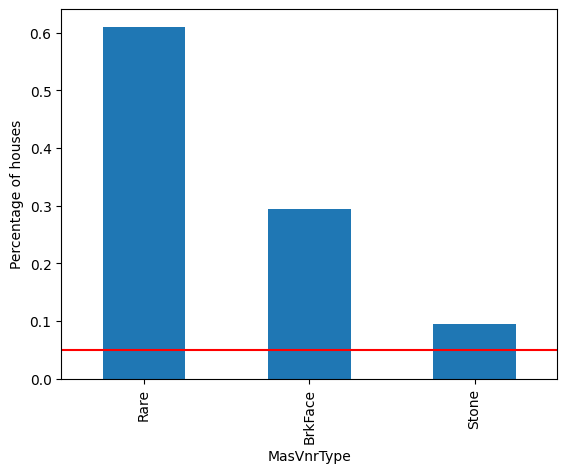

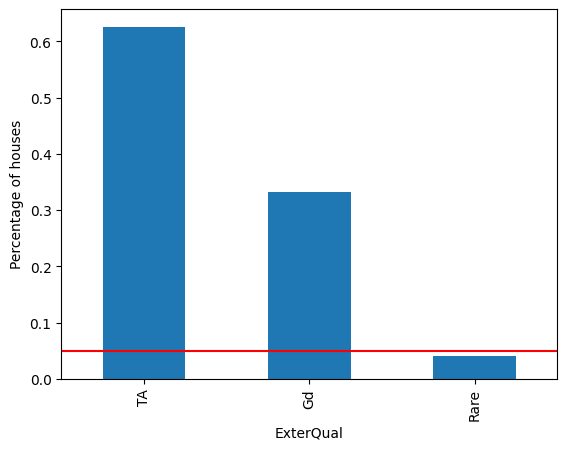

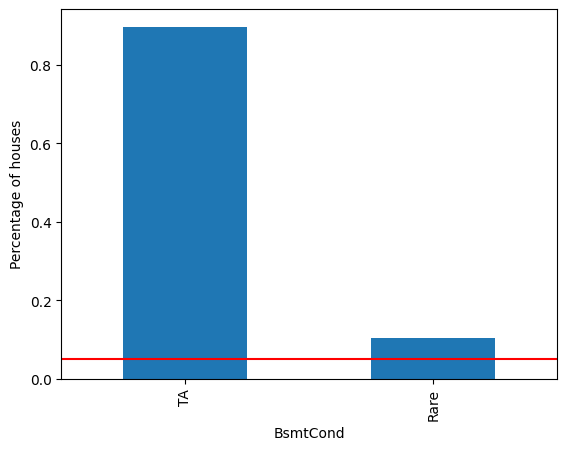

In [131]:
for col in ["MasVnrType", "ExterQual", "BsmtCond"]:
    temp_df = pd.Series(X_train[col].value_counts() / len(X_train))
    # make plot with the above percentages
    fig = temp_df.sort_values(ascending=False).plot.bar()
    fig.set_xlabel(col)
    # add a line at 5 % to flag the threshold for rare categories
    fig.axhline(y=0.05, color="red")
    fig.set_ylabel("Percentage of houses")
    plt.show()

In [133]:
X_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
64,65,60,RL,NaN,9375,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,573.0,TA,TA,PConc,Gd,TA,No,GLQ,739,Unf,0,318,1057,GasA,Ex,Y,SBrkr,1057,977,0,2034,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,1998.0,RFn,2,645,TA,TA,Y,576,36,0,0,0,0,NaN,GdPrv,NaN,0,2,2009,WD,Normal
682,683,120,RL,NaN,2887,Pave,NaN,Reg,HLS,AllPub,Inside,Gtl,Rare,Norm,Norm,1Fam,1Story,6,5,1996,1997,Gable,CompShg,Wd Sdng,Wd Sdng,Rare,0.0,TA,TA,PConc,Gd,TA,Mn,GLQ,1003,Unf,0,288,1291,GasA,Ex,Y,SBrkr,1291,0,0,1291,1,0,1,0,2,1,Gd,6,Typ,1,Gd,Attchd,1996.0,Unf,2,431,TA,TA,Y,307,0,0,0,0,0,NaN,NaN,NaN,0,11,2008,WD,Normal
960,961,20,RL,50.0,7207,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Rare,Norm,Norm,1Fam,1Story,5,7,1958,2008,Gable,CompShg,Wd Sdng,Plywood,Rare,0.0,TA,Gd,CBlock,TA,TA,Gd,BLQ,696,Unf,0,162,858,GasA,Gd,Y,SBrkr,858,0,0,858,1,0,1,0,2,1,TA,4,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,Y,117,0,0,0,0,0,NaN,NaN,NaN,0,2,2010,WD,Normal
1384,1385,50,RL,60.0,9060,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1.5Fin,6,5,1939,1950,Gable,CompShg,Rare,Rare,Rare,0.0,TA,TA,BrkTil,TA,TA,Mn,Rec,204,Unf,0,356,560,GasA,TA,Y,SBrkr,698,560,0,1258,0,0,1,0,2,1,TA,6,Typ,0,NaN,Detchd,1939.0,Unf,1,280,TA,TA,P,0,0,0,0,0,0,NaN,MnPrv,NaN,0,10,2009,WD,Normal
1100,1101,30,RL,60.0,8400,Pave,NaN,Reg,Bnk,AllPub,Inside,Gtl,Rare,Norm,Norm,1Fam,1Story,2,5,1920,1950,Gable,CompShg,Wd Sdng,Wd Sdng,Rare,0.0,TA,TA,CBlock,TA,Rare,No,Rec,290,Unf,0,0,290,GasA,TA,N,FuseF,438,0,0,438,0,0,1,0,1,1,Fa,3,Typ,0,NaN,Detchd,1930.0,Unf,1,246,TA,TA,N,0,0,0,0,0,0,NaN,NaN,NaN,0,1,2009,WD,Normal
